<a href="https://colab.research.google.com/github/surabhi13gupta/LangChains/blob/main/EDA_resumes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install PyMuPDF
!pip install python-docx
import fitz

In [80]:
import re
from PIL import Image
import io
import glob
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from docx import Document
from google.colab import drive
import zipfile
import os

In [91]:
# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [92]:
# Specify the path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/CDS-B9-Group11/Capstone Project/Profiles.zip' # Replace 'your_zip_file.zip' with the actual path

# Specify the directory where you want to extract the contents
extract_path = '/content/extracted_zip'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Zip file extracted to: {extract_path}")

Zip file extracted to: /content/extracted_zip


In [93]:
categories = []
dir_paths = [d for d in glob.glob("/content/extracted_zip/Resumes/*", recursive=True) if os.path.isdir(d)]
for dir_path in dir_paths:
    categories.append(dir_path.split('/')[-1])

In [94]:
print("Total categories: ", len(categories))
pprint(f"List down all categories: {categories}")

Total categories:  24
("List down all categories: ['CONSULTANT', 'ENGINEERING', "
 "'INFORMATION-TECHNOLOGY', 'DESIGNER', 'FINANCE', 'TEACHER', 'BPO', "
 "'AUTOMOBILE', 'BUSINESS-DEVELOPMENT', 'PUBLIC-RELATIONS', 'ARTS', "
 "'ACCOUNTANT', 'ADVOCATE', 'HR', 'HEALTHCARE', 'FITNESS', 'SALES', 'BANKING', "
 "'CONSTRUCTION', 'CHEF', 'AGRICULTURE', 'APPAREL', 'DIGITAL-MEDIA', "
 "'AVIATION']")


In [95]:
category_mapping = {}
for category in categories:
    paths = glob.glob(f"/content/extracted_zip/Resumes/{category}/*")
    category_mapping[category] = len(paths)

## Distribution for each category

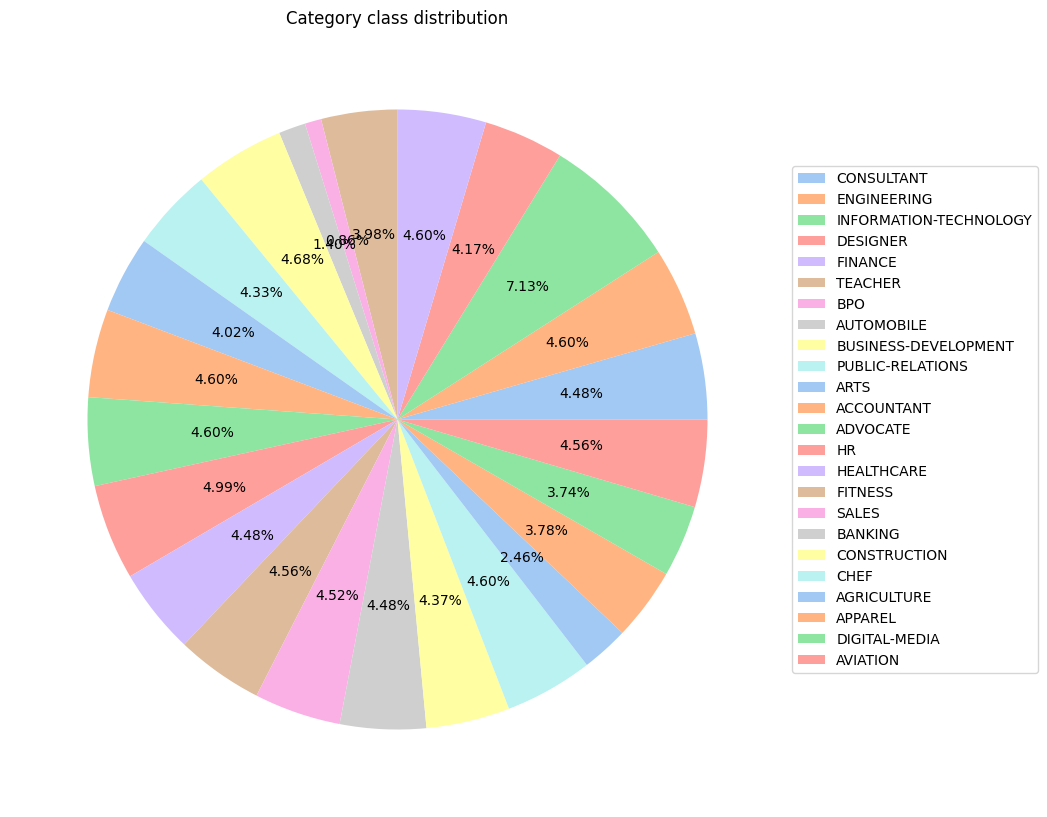

In [96]:
plt.figure(figsize=(10,15))
palette_color = sns.color_palette('pastel')
plt.pie(list(category_mapping.values()), colors=palette_color, autopct='%.2f%%')
plt.legend(labels=categories, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Category class distribution")
plt.show()

/tmp/ipython-input-3690903014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_mapping.keys()), y=list(category_mapping.values()), palette='pastel')


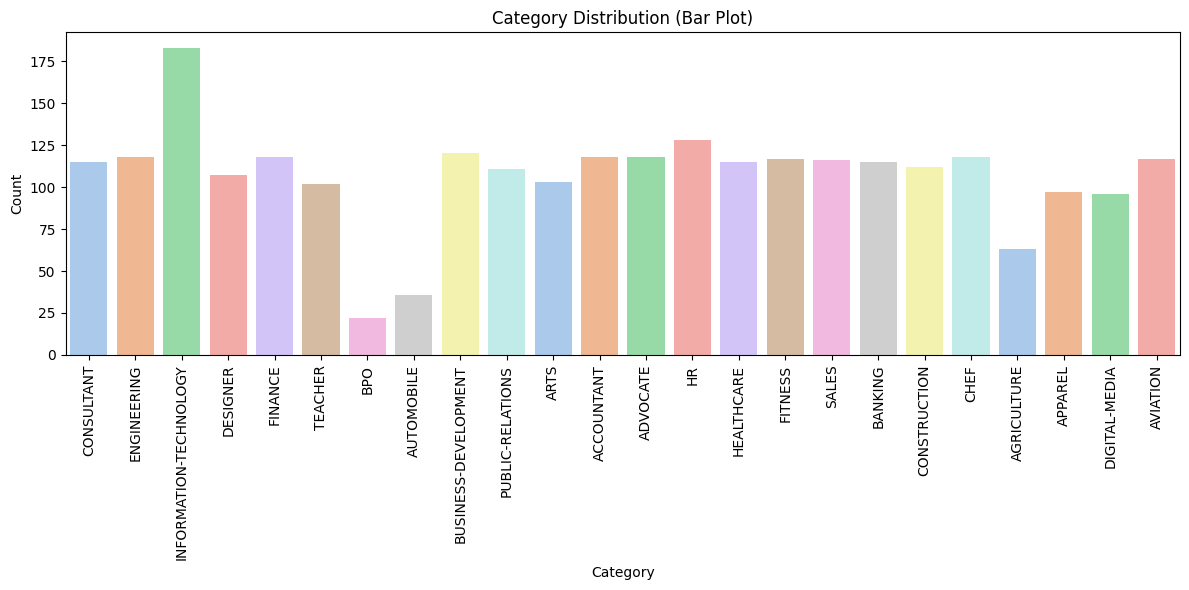

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(category_mapping.keys()), y=list(category_mapping.values()), palette='pastel')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution (Bar Plot)")
plt.tight_layout()
plt.show()

## Data Extraction

In [98]:
def extract_text_from_pdf(pdf_path):
    """Extract text from PDF using PyMuPDF."""
    doc = fitz.open(pdf_path)
    text = "".join([page.get_text() for page in doc])
    return text

def extract_text_from_docx(docx_path):
    """Extract text from DOCX using python-docx."""
    doc = Document(docx_path)
    full_text = [para.text for para in doc.paragraphs]
    return '\n'.join(full_text)

In [141]:
def extract_mobile_number(resume_text):
    r = re.compile(r'(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|[0-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|[2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{4})(?:\s*(?:#|x\.?|ext\.?|extension)\s*(\d+))?')
    result = r.findall(resume_text)

    if result:
        number = ''.join(result[0])
        return number
    return None # Return None if no phone number is found


def extract_email_addresses(resume_text):
    r = re.compile(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}")
    result = r.findall(resume_text)
    return result if result else None

In [128]:
rows = []
for category in categories:
    paths = glob.glob(f"/content/extracted_zip/Resumes/{category}/*")
    for path in paths:
        resume_content = extract_text_from_pdf(path) if '.pdf' in path else extract_text_from_docx(path)
        mobile = extract_mobile_number(resume_content)
        email = extract_email_addresses(resume_content)
        rows.append(
            {'Category': category,
             'Path': path,
             'Mobile': mobile,
             'Email': email}
        )
df = pd.DataFrame(rows)
display(df.head())

,Category,Path,Mobile,Email
0,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/2136...,None,None
1,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/4977...,None,None
2,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/3139...,None,None
3,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/2929...,None,None
4,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/2772...,None,None


In [129]:
mobile_email_df = df[df.Mobile.notna() & df.Email.notna()]
print("Number of resumes having Mobile and Email and needs pre-processing: ", len(mobile_email_df))
mobile_email_df.head()

Number of resumes having Mobile and Email and needs pre-processing:  87


,Category,Path,Mobile,Email
30,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/2691...,4045567261,[Novella.Walton@VerizonWireless.com]
51,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/9542...,8019106500,[Greg@TheVarium.com]
96,CONSULTANT,/content/extracted_zip/Resumes/CONSULTANT/2257...,9183443202,[Bradybiggs918@gmail.com]
123,ENGINEERING,/content/extracted_zip/Resumes/ENGINEERING/254...,7166086,[korbitzt@hotmail.com]
202,ENGINEERING,/content/extracted_zip/Resumes/ENGINEERING/902...,17023530976,[cole.grundstedt@gmail.com]


In [130]:
paths_to_update = mobile_email_df.Path.values
print(paths_to_update)

['/content/extracted_zip/Resumes/CONSULTANT/26919036.pdf'
 '/content/extracted_zip/Resumes/CONSULTANT/95429627.pdf'
 '/content/extracted_zip/Resumes/CONSULTANT/22571461.pdf'
 '/content/extracted_zip/Resumes/ENGINEERING/25425322.pdf'
 '/content/extracted_zip/Resumes/ENGINEERING/90280583.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/KumarShubhamSrivastava.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/VIGNESH.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/Balaji.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/SaumyaKhare.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/90867631.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/RutikaMhatre.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/Ashutoshkumar.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/Lokeswaranv.docx'
 '/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/AbhishekGhosh.pdf'
 '/content/extracted_zip/Resumes/INFORMATION-T

In [142]:
def redact_email_phone(input_pdf, output_pdf):
    # Open the PDF
    doc = fitz.open(input_pdf)

    # Regex patterns for email and phone
    email_pattern = re.compile(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}")
    phone_pattern = re.compile(r'(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|[0-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|[2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{4})(?:\s*(?:#|x\.?|ext\.?|extension)\s*(\d+))?')

    # Loop through each page
    for page in doc:
        text_dict = page.get_text("dict")
        for block in text_dict["blocks"]:
            if "lines" in block:
                for line in block["lines"]:
                    for span in line["spans"]:
                        span_text = span["text"]

                        # Check for email
                        if email_pattern.search(span_text):
                            page.add_redact_annot(
                                span["bbox"],  # bounding box of text
                                text="abc@gmail.com",
                                fill=(1, 1, 1)  # white background
                            )

                        # Check for phone number
                        if phone_pattern.search(span_text):
                            page.add_redact_annot(
                                span["bbox"],
                                text="1234098765",
                                fill=(1, 1, 1)
                            )

        # Apply all redactions on the page
        page.apply_redactions()

    # Save the modified PDF
    doc.save(output_pdf)
    doc.close()

In [136]:
# Example usage
redact_email_phone("/content/extracted_zip/Resumes/INFORMATION-TECHNOLOGY/SURAJCHAVAN.pdf", "/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/SURAJCHAVAN.pdf")
print("Redacted PDF")

Redacted PDF


In [143]:
updated_paths = []
for path in paths_to_update:
    if '.pdf' in path:
        splits = path.split('/')
        category, resume_name = splits[-2], splits[-1]
        # Create the extraction directory if it doesn't exist
        updated_directory = f"/content/extracted_zip/ResumesUpdated/{category}"
        os.makedirs(updated_directory, exist_ok=True)
        updated_path = f"{updated_directory}/{resume_name}"
        redact_email_phone(path, updated_path)
        updated_paths.append(updated_path)
updated_paths

['/content/extracted_zip/ResumesUpdated/CONSULTANT/26919036.pdf',
 '/content/extracted_zip/ResumesUpdated/CONSULTANT/95429627.pdf',
 '/content/extracted_zip/ResumesUpdated/CONSULTANT/22571461.pdf',
 '/content/extracted_zip/ResumesUpdated/ENGINEERING/25425322.pdf',
 '/content/extracted_zip/ResumesUpdated/ENGINEERING/90280583.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/KumarShubhamSrivastava.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/VIGNESH.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/Balaji.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/SaumyaKhare.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/90867631.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/RutikaMhatre.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/Ashutoshkumar.pdf',
 '/content/extracted_zip/ResumesUpdated/INFORMATION-TECHNOLOGY/AbhishekGhosh.pdf',
 '/content/extra